**Import Libraries**

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

import gc
from pathlib import Path

**Reading Data**

In [453]:
# Start with input file path

# Create table with list of CSV files to be read in, w/ corresponding df name
# This does include large 'train' data set (read in separately)
csv_and_df_names = pd.DataFrame(data = {
  'csv_name': ['seasons', 'teams', 'players', 'awards',
    'example_test', 'example_sample_submission'],
  'df_name': ['seasons', 'teams', 'players', 'awards_pre2018',
    'example_test', 'example_sample_submission'] 
  })

# Set up for tabbed output
kaggle_data_tabs = widgets.Tab()

# Add Output widgets for each (eventual) DF as tabs' children
kaggle_data_tabs.children = list([widgets.Output() for df_name 
  in csv_and_df_names['df_name']])

for index, row in csv_and_df_names.iterrows():
    
    csv_name = row['csv_name']
    df_name = row['df_name']
    
    # Read from CSV and create df with specified name in environment
    globals()[df_name] = pd.read_csv(f"{csv_name}.csv")

    # Set tab title to df name
    kaggle_data_tabs.set_title(index, df_name)
    
    # Display corresponding table output for this tab name
    with kaggle_data_tabs.children[index]:
        display(eval(df_name))

display(kaggle_data_tabs)

Tab(children=(Output(), Output(), Output(), Output(), Output(), Output()), _titles={'0': 'seasons', '1': 'teams', '2': 'players', '3': 'awards_pre2018', '4': 'example_test', '5': 'example_sample_submission'})

In [6]:
train = pd.read_csv('train.csv')

# Convert training data date field to pandas datetime type
train['date'] = pd.to_datetime(train['date'], format = "%Y%m%d")

display(train.info())

display(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 12 columns):
date                       1216 non-null datetime64[ns]
nextDayPlayerEngagement    1216 non-null object
games                      639 non-null object
rosters                    1216 non-null object
playerBoxScores            538 non-null object
teamBoxScores              538 non-null object
transactions               1103 non-null object
standings                  531 non-null object
awards                     294 non-null object
events                     536 non-null object
playerTwitterFollowers     40 non-null object
teamTwitterFollowers       40 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 114.1+ KB


None

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
0,2018-01-01,"[{""engagementMetricsDate"":""2018-01-02"",""player...",NaN,"[{""playerId"":400121,""gameDate"":""2018-01-01"",""t...",NaN,NaN,"[{""transactionId"":340732,""playerId"":547348,""pl...",NaN,NaN,NaN,"[{""date"":""2018-01-01"",""playerId"":545361,""playe...","[{""date"":""2018-01-01"",""teamId"":147,""teamName"":..."
1,2018-01-02,"[{""engagementMetricsDate"":""2018-01-03"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-02"",""t...",NaN,NaN,"[{""transactionId"":339458,""playerId"":621173,""pl...",NaN,NaN,NaN,NaN,NaN
2,2018-01-03,"[{""engagementMetricsDate"":""2018-01-04"",""player...",NaN,"[{""playerId"":425492,""gameDate"":""2018-01-03"",""t...",NaN,NaN,"[{""transactionId"":347527,""playerId"":572389,""pl...",NaN,NaN,NaN,NaN,NaN
3,2018-01-04,"[{""engagementMetricsDate"":""2018-01-05"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-04"",""t...",NaN,NaN,"[{""transactionId"":339549,""playerId"":545343,""pl...",NaN,NaN,NaN,NaN,NaN
4,2018-01-05,"[{""engagementMetricsDate"":""2018-01-06"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-05"",""t...",NaN,NaN,"[{""transactionId"":341195,""playerId"":628336,""pl...",NaN,NaN,NaN,NaN,NaN
5,2018-01-06,"[{""engagementMetricsDate"":""2018-01-07"",""player...",NaN,"[{""playerId"":425772,""gameDate"":""2018-01-06"",""t...",NaN,NaN,"[{""transactionId"":339712,""playerId"":678962,""pl...",NaN,NaN,NaN,NaN,NaN
6,2018-01-07,"[{""engagementMetricsDate"":""2018-01-08"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-07"",""t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-08,"[{""engagementMetricsDate"":""2018-01-09"",""player...",NaN,"[{""playerId"":408045,""gameDate"":""2018-01-08"",""t...",NaN,NaN,"[{""transactionId"":341204,""playerId"":458913,""pl...",NaN,NaN,NaN,NaN,NaN
8,2018-01-09,"[{""engagementMetricsDate"":""2018-01-10"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-09"",""t...",NaN,NaN,"[{""transactionId"":339834,""playerId"":642091,""pl...",NaN,NaN,NaN,NaN,NaN
9,2018-01-10,"[{""engagementMetricsDate"":""2018-01-11"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-10"",""t...",NaN,NaN,"[{""transactionId"":358621,""playerId"":650645,""pl...",NaN,NaN,NaN,NaN,NaN


**Unpack nested dataframe**

In [7]:
# Get names of all "nested" data frames in daily training set
daily_data_nested_df_names = train.drop('date', axis = 1).columns.values.tolist()

for df_name in daily_data_nested_df_names:
    date_nested_table = train[['date', df_name]]

    date_nested_table = (date_nested_table[
      ~pd.isna(date_nested_table[df_name])
      ].
      reset_index(drop = True)
      )
    
    daily_dfs_collection = []
    
    for date_index, date_row in date_nested_table.iterrows():
        daily_df = pd.read_json(date_row[df_name])
        
        daily_df['dailyDataDate'] = date_row['date']
        
        daily_dfs_collection = daily_dfs_collection + [daily_df]

    # Concatenate all daily dfs into single df for each row
    unnested_table = (pd.concat(daily_dfs_collection,
      ignore_index = True).
      # Set and reset index to move 'dailyDataDate' to front of df
      set_index('dailyDataDate').
      reset_index()
      )
    
    # Creates 1 pandas df per unnested df from daily data read in, with same name
    globals()[df_name] = unnested_table    
    
    # Clean up tables and collection of daily data frames for this df
    del(date_nested_table, daily_dfs_collection, unnested_table)

# Set up for tabbed output
daily_data_unnested_tabs = widgets.Tab()

# Add Output widgets for each (eventual) DF as tabs' children
daily_data_unnested_tabs.children = list([widgets.Output() 
  for df_name in daily_data_nested_df_names])

for index in range(0, len(daily_data_nested_df_names)):
    df_name = daily_data_nested_df_names[index]
    
    # Rename tab bar titles to df names
    daily_data_unnested_tabs.set_title(index, df_name)

    # Display corresponding table output for this tab name
    with daily_data_unnested_tabs.children[index]:
        display(eval(df_name))

display(daily_data_unnested_tabs)

Tab(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output()), _titles={'0': 'nextDayPlayerEngagement', '1': 'games', '2': 'rosters', '3': 'playerBoxScores', '4': 'teamBoxScores', '5': 'transactions', '6': 'standings', '7': 'awards', '8': 'events', '9': 'playerTwitterFollowers', '10': 'teamTwitterFollowers'})

In [8]:
del(train)

gc.collect()

585

**Correlation between targets**

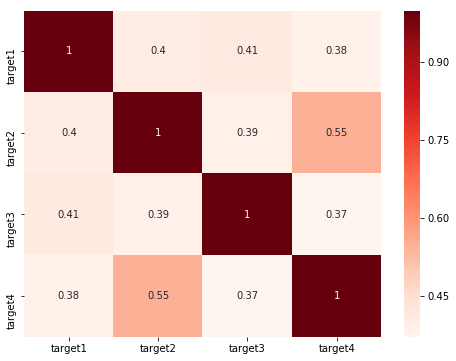

In [13]:
plt.figure(figsize=(8,6))
cor = nextDayPlayerEngagement[['target1','target2','target3','target4']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Relationship between important player-level stats with our target**

*Compute averagre of the four targets*

In [107]:
player_eng_info = nextDayPlayerEngagement.copy()
player_eng_info['target1To4Avg'] = np.mean(
  player_eng_info[['target1', 'target2', 'target3', 'target4']],
  axis = 1)

In [108]:
player_eng_info = player_eng_info[player_eng_info['dailyDataDate'] >='2018-03-29']
player_eng_info = pd.merge(
  player_eng_info,
  playerBoxScores[['dailyDataDate','playerId','gamePk','teamId', 'playerName', 'runsScored', 'atBats', 'homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi']],
   on = ['dailyDataDate','playerId'],
   how = 'inner'
   )


In [109]:
player_eng_info.head()

,dailyDataDate,engagementMetricsDate,playerId,target1,target2,target3,target4,target1To4Avg,gamePk,teamId,...,runsScored,atBats,homeRuns,flyOuts,hits,strikes,balks,errors,chances,rbi
0,2018-03-29,2018-03-30,608365,2.040838,7.893376,0.052359,2.599964,3.146634,529407,112,...,1.0,3.0,0.0,0.0,2.0,NaN,NaN,1.0,9.0,0.0
1,2018-03-29,2018-03-30,502624,1.068945,5.105543,2.722191,0.918550,2.453807,529413,158,...,1.0,2.0,0.0,0.0,1.0,61.0,0.0,0.0,0.0,0.0
2,2018-03-29,2018-03-30,643338,0.385945,5.368812,0.074404,0.565661,1.598706,529415,147,...,NaN,NaN,NaN,NaN,NaN,14.0,0.0,0.0,1.0,NaN
3,2018-03-29,2018-03-30,570560,0.131860,6.200931,0.002296,0.181634,1.629180,529408,145,...,1.0,4.0,0.0,0.0,1.0,NaN,NaN,0.0,5.0,3.0
4,2018-03-29,2018-03-30,523260,0.011800,9.933713,6.076820,0.978230,4.250141,529406,111,...,NaN,NaN,NaN,NaN,NaN,13.0,0.0,NaN,NaN,NaN


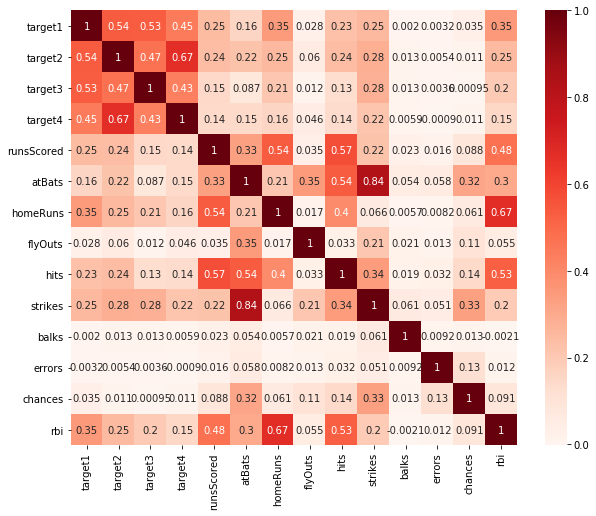

In [110]:
plt.figure(figsize=(10,8))
cor = player_eng_info[['target1', 'target2', 'target3', 'target4','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Correlation matrix between them**

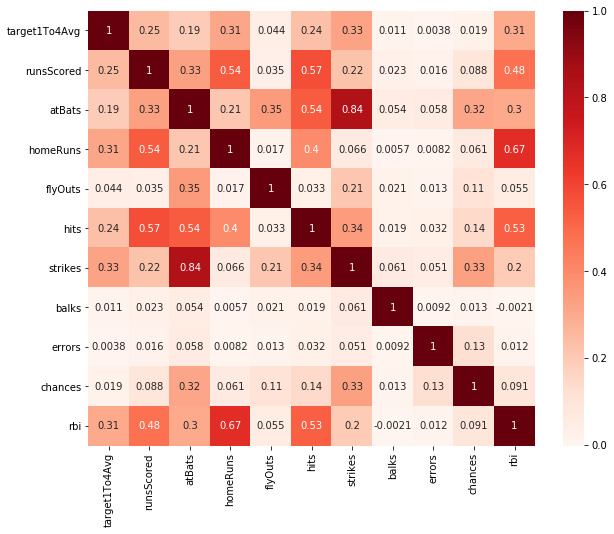

In [59]:
plt.figure(figsize=(10,8))
cor = player_eng_info[['target1To4Avg','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

*note : There are some features highly correlated with each other and we may choose only one from them and neglect the other*

In [164]:
standings_stats = pd.merge(
  player_eng_info,
  standings[['dailyDataDate','teamId','wins','losses','pct','xWinLossPct','divisionRank'
             ,'leagueRank','wildCardRank','lastTenWins','lastTenLosses']],
   on = ['dailyDataDate','teamId'],
   how = 'inner'
   )

**Correlation between important stats from standings data and target**

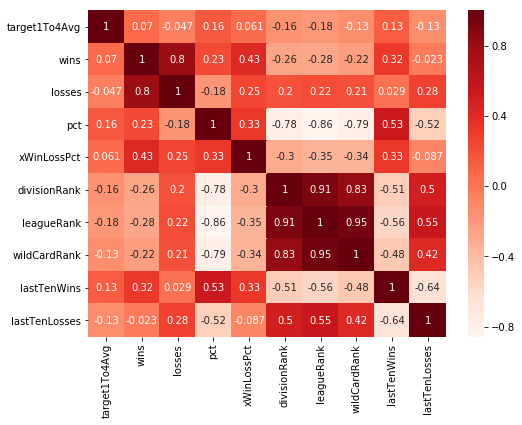

In [165]:
plt.figure(figsize=(8,6))
cor = standings_stats[['target1To4Avg','wins','losses','pct','xWinLossPct','divisionRank','leagueRank',
                       'wildCardRank','lastTenWins','lastTenLosses']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [158]:
averaged_data = standings_stats.groupby('dailyDataDate', as_index=True)[['target1', 'target2', 'target3', 'target4','target1To4Avg','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi','pct','xWinLossPct','divisionRank','leagueRank','wildCardRank','lastTenWins','lastTenLosses']].mean()

In [159]:
averaged_data.head()

,target1,target2,target3,target4,target1To4Avg,runsScored,atBats,homeRuns,flyOuts,hits,...,errors,chances,rbi,pct,xWinLossPct,divisionRank,leagueRank,wildCardRank,lastTenWins,lastTenLosses
dailyDataDate,,,,,,,,,,,,,,,,,,,,,
2018-03-29,1.457550,6.669011,2.605581,1.898772,3.157729,0.339286,2.654762,0.098214,0.309524,0.622024,...,0.038328,3.407666,0.324405,0.498765,0.148148,3.014815,8.014815,7.769821,0.498765,0.501235
2018-03-30,1.888859,9.950661,4.710711,2.379338,4.732392,0.288136,2.783051,0.050847,0.474576,0.606780,...,0.081081,3.498069,0.274576,0.494135,0.071848,3.190616,8.164223,7.080128,0.897361,0.914956
2018-03-31,2.792836,3.758229,2.468472,2.998131,3.004417,0.398281,2.742120,0.091691,0.389685,0.693410,...,0.051118,3.182109,0.381089,0.500410,0.155597,3.014742,7.958231,7.492063,1.326781,1.319410
2018-04-01,1.629448,7.919717,2.635053,4.986807,4.292756,0.368421,3.003759,0.105263,0.473684,0.714286,...,0.019920,3.390438,0.349624,0.502517,0.137477,3.078550,8.063444,6.778146,1.761329,1.746224
2018-04-02,1.727813,5.568969,5.081073,2.351648,3.682376,0.312903,2.683871,0.096774,0.354839,0.641935,...,0.048148,3.355556,0.306452,0.500866,0.259721,2.911681,7.857550,6.809886,2.165242,2.128205


**Plot Average of targets of all players for each day across time and compare it with average of strikes**

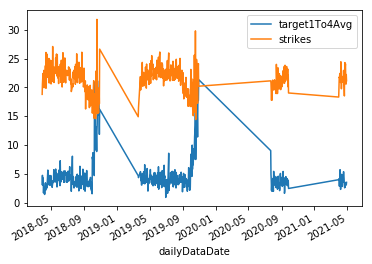

In [71]:
averaged_data[['target1To4Avg','strikes']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

**Plot Average of targets of all players for each day across time and compare it with average of atBats**

In [82]:
averaged_data['atBats'] = averaged_data['atBats']*10

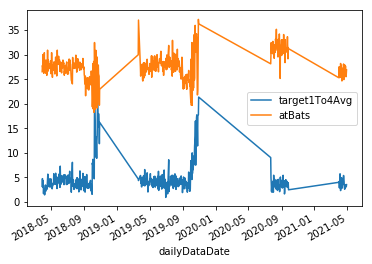

In [83]:
averaged_data[['target1To4Avg','atBats']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

**Plot Average of targets of all players for each day across time and compare it with average of xWinLossPct**

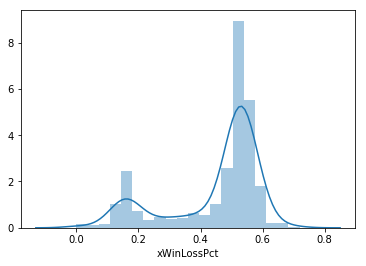

In [73]:
sns.distplot(averaged_data['xWinLossPct'])
plt.show()

In [88]:
averaged_data['xWinLossPct'] = averaged_data['xWinLossPct']*50

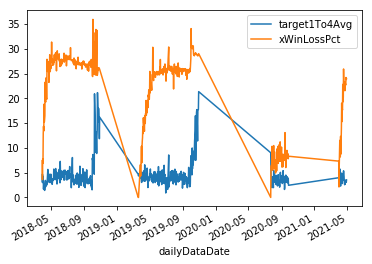

In [89]:
averaged_data[['target1To4Avg','xWinLossPct']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

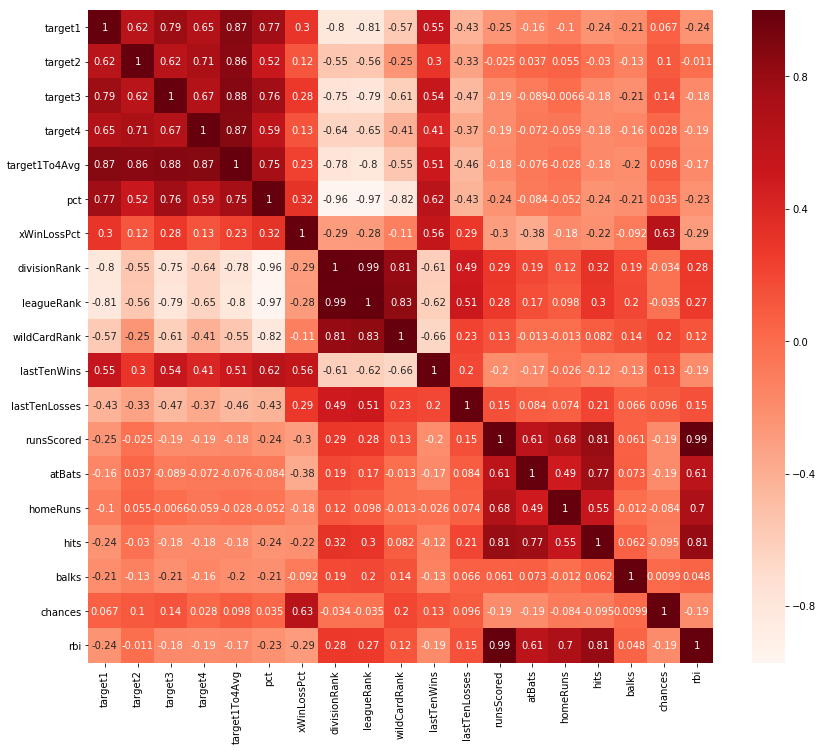

In [160]:
plt.figure(figsize=(14,12))
cor = averaged_data[['target1', 'target2', 'target3', 'target4','target1To4Avg','pct','xWinLossPct','divisionRank','leagueRank','wildCardRank','lastTenWins','lastTenLosses','runsScored','atBats','homeRuns','hits',
                   'balks','chances','rbi']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

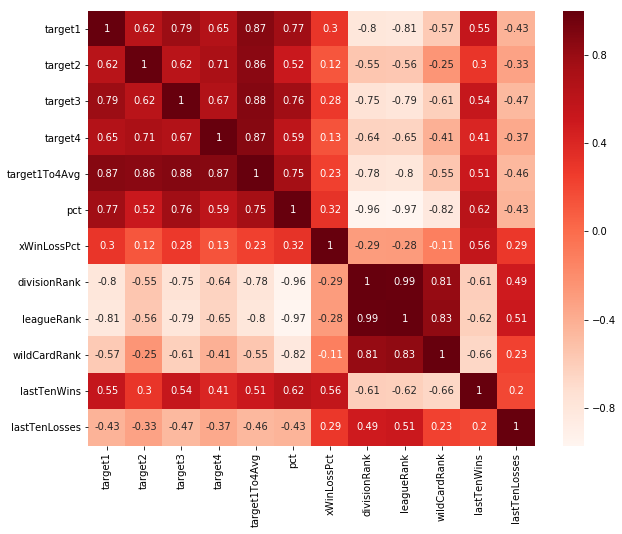

In [161]:
plt.figure(figsize=(10,8))
cor = averaged_data[['target1', 'target2', 'target3', 'target4','target1To4Avg','pct','xWinLossPct','divisionRank','leagueRank','wildCardRank','lastTenWins','lastTenLosses']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**We see here that 'pct' variable has strong positive correlation with target variable after computing averages of them per every unique day**

**'lastTenWins' variable has strong positive correlation with target**

**Also 'divisionRank' variable has strong negative correlation with target**

**'leagueRank' variable has strong negative correlation with target**

**'wildCardRank' variable has strong negative correlation with target**

*Before grouping data by unique days and computing averages of variables, the correlation between target and 'pct' was only **0.16** and was **-0.16** with 'divisionRank'*

**We can also see here that 'divisionRank' variable has completely opposite behavior compared to target across time **

In [99]:
averaged_data['divisionRank'] = averaged_data['divisionRank']*10

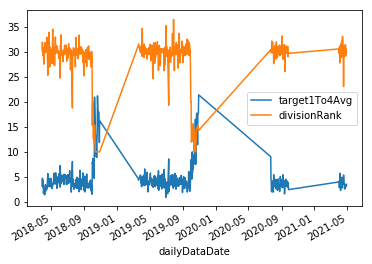

In [100]:
averaged_data[['target1To4Avg','divisionRank']].plot()
plt.show()

**And here we see that 'Current winning percentage' or 'pct' variable has almost the same behavior as target**

In [105]:
averaged_data['pct'] = averaged_data['pct']*50

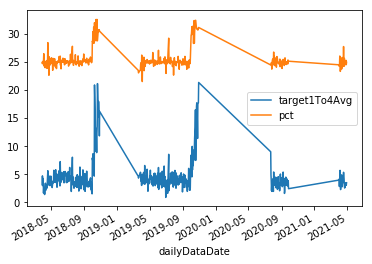

In [106]:
averaged_data[['target1To4Avg','pct']].plot()
plt.show()

In [166]:
standings_stats.head()

,dailyDataDate,engagementMetricsDate,playerId,target1,target2,target3,target4,target1To4Avg,gamePk,teamId,...,rbi,wins,losses,pct,xWinLossPct,divisionRank,leagueRank,wildCardRank,lastTenWins,lastTenLosses
0,2018-03-29,2018-03-30,608365,2.040838,7.893376,0.052359,2.599964,3.146634,529407,112,...,0.0,1,0,1.0,0.0,1,3,3.0,1,0
1,2018-03-29,2018-03-30,458677,0.929021,9.736261,0.089561,1.538701,3.073386,529407,112,...,0.0,1,0,1.0,0.0,1,3,3.0,1,0
2,2018-03-29,2018-03-30,452657,0.070699,4.912792,42.183173,1.803368,12.242508,529407,112,...,0.0,1,0,1.0,0.0,1,3,3.0,1,0
3,2018-03-29,2018-03-30,518553,0.127337,6.600536,0.093235,0.806975,1.907021,529407,112,...,0.0,1,0,1.0,0.0,1,3,3.0,1,0
4,2018-03-29,2018-03-30,467008,0.010620,1.593719,1.045336,0.300994,0.737667,529407,112,...,0.0,1,0,1.0,0.0,1,3,3.0,1,0


**Add some new features**

In [366]:
final_data = standings_stats.drop(['engagementMetricsDate','target1To4Avg'],axis=1)

In [367]:
final_data.shape

(182955, 28)

In [368]:
final_data = pd.merge(
  final_data,
  awards[['dailyDataDate','awardName','playerId']],
   on = ['dailyDataDate','playerId'],
   how = 'left'
   )

In [369]:
final_data.shape

(182964, 29)

In [370]:
final_data.head()

,dailyDataDate,playerId,target1,target2,target3,target4,gamePk,teamId,playerName,runsScored,...,wins,losses,pct,xWinLossPct,divisionRank,leagueRank,wildCardRank,lastTenWins,lastTenLosses,awardName
0,2018-03-29,608365,2.040838,7.893376,0.052359,2.599964,529407,112,Addison Russell,1.0,...,1,0,1.0,0.0,1,3,3.0,1,0,NaN
1,2018-03-29,458677,0.929021,9.736261,0.089561,1.538701,529407,112,Justin Wilson,0.0,...,1,0,1.0,0.0,1,3,3.0,1,0,NaN
2,2018-03-29,452657,0.070699,4.912792,42.183173,1.803368,529407,112,Jon Lester,0.0,...,1,0,1.0,0.0,1,3,3.0,1,0,NaN
3,2018-03-29,518553,0.127337,6.600536,0.093235,0.806975,529407,112,Steve Cishek,0.0,...,1,0,1.0,0.0,1,3,3.0,1,0,NaN
4,2018-03-29,467008,0.010620,1.593719,1.045336,0.300994,529407,112,Pedro Strop,0.0,...,1,0,1.0,0.0,1,3,3.0,1,0,NaN


In [371]:
final_data = final_data.fillna(0)

In [372]:
final_data['awardName'] = [1 if x!=0 else 0 for x in final_data['awardName'] ]
final_data['awardName'].value_counts()

0    182596
1       368
Name: awardName, dtype: int64

In [373]:
final_data = pd.merge(
  final_data,
  playerTwitterFollowers[['dailyDataDate','numberOfFollowers','playerId']],
   on = ['dailyDataDate','playerId'],
   how = 'left'
   )

In [374]:
final_data = pd.merge(
  final_data,
  teamTwitterFollowers[['dailyDataDate','numberOfFollowers','teamId']],
   on = ['dailyDataDate','teamId'],
   how = 'left'
   )

In [375]:
final_data = pd.merge(
  final_data,
  games[['dailyDataDate','gamePk','isTie','gamesInSeries','seriesDescription','homeWinPct','awayWinPct','homeId','awayId']],
   on = ['dailyDataDate','gamePk'],
   how = 'left'
   )

**Create new features equal to the difference between pct of home team wins and pct of away team wins**

In [376]:
final_data['pct_diff'] = (final_data['homeWinPct'] - final_data['awayWinPct']).abs()

**There is a little bit correlation between target and my new feature**

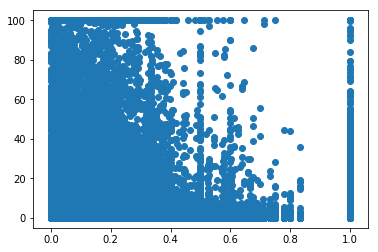

In [377]:
plt.scatter(final_data['pct_diff'],final_data['target1'])
plt.show()

In [378]:
final_data = pd.merge(
  final_data,
  standings[['dailyDataDate','teamId','divisionRank', 'leagueRank','wildCardRank']],
   left_on = ['dailyDataDate','homeId'],
   right_on= ['dailyDataDate','teamId'],
   how = 'left'
   )

In [379]:
final_data = pd.merge(
  final_data,
  standings[['dailyDataDate','teamId','divisionRank', 'leagueRank','wildCardRank']],
   left_on = ['dailyDataDate','awayId'],
   right_on= ['dailyDataDate','teamId'],
   how = 'left'
   )

In [380]:
final_data = final_data.rename(columns={'divisionRank_x': 'player_divisionRank', 'divisionRank_y': 'home_divisionRank', 
                                       'divisionRank' : 'away_divisionRank'})

In [381]:
final_data = final_data.rename(columns={'leagueRank_x': 'player_leagueRank', 'leagueRank_y': 'home_leagueRank', 
                                       'leagueRank' : 'away_leagueRank'})

In [382]:
final_data = final_data.rename(columns={'wildCardRank_x': 'player_wildCardRank', 'wildCardRank_y': 'home_wildCardRank', 
                                       'wildCardRank' : 'away_wildCardRank'})

**Create new features equal to the difference between each rank of home team and away team**

In [383]:
final_data['divisionRank_diff'] = (final_data['home_divisionRank'] - final_data['away_divisionRank']).abs()

In [384]:
final_data['leagueRank_diff'] = (final_data['home_leagueRank'] - final_data['away_leagueRank']).abs()

In [385]:
final_data['wildCardRank_diff'] = (final_data['home_wildCardRank'] - final_data['away_wildCardRank']).abs()

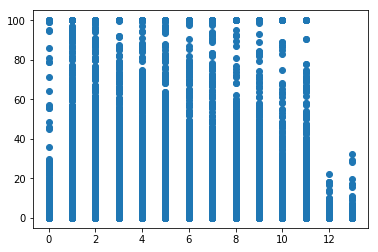

In [386]:
plt.scatter(final_data['wildCardRank_diff'],final_data['target1'])
plt.show()

In [387]:
final_data = final_data.drop(['playerName','homeId', 'awayId'],axis=1)

In [388]:
final_data = final_data.drop(['seriesDescription'],axis=1)

In [389]:
final_data = final_data.drop(['teamId_x','teamId_y', 'teamId'],axis=1)

In [390]:
final_data.head()

,dailyDataDate,playerId,target1,target2,target3,target4,gamePk,runsScored,atBats,homeRuns,...,pct_diff,home_divisionRank,home_leagueRank,home_wildCardRank,away_divisionRank,away_leagueRank,away_wildCardRank,divisionRank_diff,leagueRank_diff,wildCardRank_diff
0,2018-03-29,608365,2.040838,7.893376,0.052359,2.599964,529407,1.0,3.0,0.0,...,1.0,4,12,12.0,1,3,3.0,3,9,9.0
1,2018-03-29,458677,0.929021,9.736261,0.089561,1.538701,529407,0.0,0.0,0.0,...,1.0,4,12,12.0,1,3,3.0,3,9,9.0
2,2018-03-29,452657,0.070699,4.912792,42.183173,1.803368,529407,0.0,2.0,0.0,...,1.0,4,12,12.0,1,3,3.0,3,9,9.0
3,2018-03-29,518553,0.127337,6.600536,0.093235,0.806975,529407,0.0,1.0,0.0,...,1.0,4,12,12.0,1,3,3.0,3,9,9.0
4,2018-03-29,467008,0.010620,1.593719,1.045336,0.300994,529407,0.0,0.0,0.0,...,1.0,4,12,12.0,1,3,3.0,3,9,9.0


In [418]:
playerBoxScores.columns

Index(['dailyDataDate', 'airOutsPitching', 'assists', 'atBats',
       'atBatsPitching', 'balks', 'balls', 'baseOnBalls',
       'baseOnBallsPitching', 'battersFaced', 'battingOrder', 'blownSaves',
       'catchersInterference', 'catchersInterferencePitching',
       'caughtStealing', 'caughtStealingPitching', 'chances',
       'completeGamesPitching', 'doubles', 'doublesPitching', 'earnedRuns',
       'errors', 'flyOuts', 'flyOutsPitching', 'gameDate', 'gamePk',
       'gameTimeUTC', 'gamesFinishedPitching', 'gamesPlayedBatting',
       'gamesPlayedPitching', 'gamesStartedPitching', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'groundOuts', 'groundOutsPitching',
       'hitBatsmen', 'hitByPitch', 'hitByPitchPitching', 'hits',
       'hitsPitching', 'holds', 'home', 'homeRuns', 'homeRunsPitching',
       'inheritedRunners', 'inheritedRunnersScored', 'inningsPitched',
       'intentionalWalks', 'intentionalWalksPitching', 'jerseyNum',
       'leftOnBase', 'lossesPitching', 'ou

In [419]:
data.columns

Index(['dailyDataDate', 'playerId', 'target1', 'target2', 'target3', 'target4',
       'gamePk', 'runsScored', 'atBats', 'homeRuns', 'flyOuts', 'hits',
       'strikes', 'balks', 'errors', 'chances', 'rbi', 'wins', 'losses', 'pct',
       'xWinLossPct', 'player_divisionRank', 'player_leagueRank',
       'player_wildCardRank', 'lastTenWins', 'lastTenLosses', 'awardName',
       'numberOfFollowers_x', 'numberOfFollowers_y', 'isTie', 'gamesInSeries',
       'homeWinPct', 'awayWinPct', 'pct_diff', 'home_divisionRank',
       'home_leagueRank', 'home_wildCardRank', 'away_divisionRank',
       'away_leagueRank', 'away_wildCardRank', 'divisionRank_diff',
       'leagueRank_diff', 'wildCardRank_diff'],
      dtype='object')

In [417]:
data = final_data.copy()

In [421]:
data = pd.merge(
  data,
  playerBoxScores[['dailyDataDate','playerId','assists', 'balls', 'baseOnBalls',
       'baseOnBallsPitching', 'battersFaced', 'battingOrder', 'blownSaves',
       'catchersInterference', 'catchersInterferencePitching',
       'caughtStealing', 'caughtStealingPitching', 'chances',
       'completeGamesPitching', 'doubles', 'doublesPitching', 'earnedRuns','totalBases', 'triples', 'triplesPitching', 'wildPitches',
       'winsPitching']],
   on = ['dailyDataDate','playerId'],
   how = 'left'
   )

In [425]:
data = data.drop(['chances_y','gamePk'],axis=1)

In [429]:
data = data.fillna(0)

In [430]:
feature_columns = [x for x in data.columns[7:]]

In [431]:
target_columns = [x for x in data.columns[2:6]]

In [433]:
data[feature_columns] = data[feature_columns].astype(np.float32)

In [434]:
data = data.fillna(0)

In [441]:
data.columns

Index(['dailyDataDate', 'playerId', 'target1', 'target2', 'target3', 'target4',
       'runsScored', 'atBats', 'homeRuns', 'flyOuts', 'hits', 'strikes',
       'balks', 'errors', 'chances_x', 'rbi', 'wins', 'losses', 'pct',
       'xWinLossPct', 'player_divisionRank', 'player_leagueRank',
       'player_wildCardRank', 'lastTenWins', 'lastTenLosses', 'awardName',
       'numberOfFollowers_x', 'numberOfFollowers_y', 'isTie', 'gamesInSeries',
       'homeWinPct', 'awayWinPct', 'pct_diff', 'home_divisionRank',
       'home_leagueRank', 'home_wildCardRank', 'away_divisionRank',
       'away_leagueRank', 'away_wildCardRank', 'divisionRank_diff',
       'leagueRank_diff', 'wildCardRank_diff', 'assists', 'balls',
       'baseOnBalls', 'baseOnBallsPitching', 'battersFaced', 'battingOrder',
       'blownSaves', 'catchersInterference', 'catchersInterferencePitching',
       'caughtStealing', 'caughtStealingPitching', 'completeGamesPitching',
       'doubles', 'doublesPitching', 'earnedRuns', 'tot

**Splitting data into training and testing**

In [435]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[feature_columns],data[target_columns],test_size=0.2, random_state=42)

**Standard scaling data**

In [436]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#test = sc.transform(test)


**Create and run the model to predict target variables**

In [438]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras import backend as K

model = Sequential()
model.add(Dense(256, input_dim=55, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mae'])
#K.set_value(model.optimizer.learning_rate, 0.001)

history = model.fit(x_test, y_test, epochs=200, batch_size=500, verbose=1, validation_data=(x_test,y_test))

Train on 37467 samples, validate on 37467 samples
Epoch 1/200
37467/37467 [==============================] - 1s 27us/sample - loss: 3.1326 - mean_absolute_error: 3.1326 - val_loss: 2.9951 - val_mean_absolute_error: 2.9951
Epoch 2/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.9845 - mean_absolute_error: 2.9845 - val_loss: 2.9644 - val_mean_absolute_error: 2.9644
Epoch 3/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.9623 - mean_absolute_error: 2.9623 - val_loss: 2.9747 - val_mean_absolute_error: 2.9747
Epoch 4/200
37467/37467 [==============================] - 1s 15us/sample - loss: 2.9464 - mean_absolute_error: 2.9464 - val_loss: 2.9233 - val_mean_absolute_error: 2.9233
Epoch 5/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.9327 - mean_absolute_error: 2.9327 - val_loss: 2.9148 - val_mean_absolute_error: 2.9148
Epoch 6/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.9146 -

37467/37467 [==============================] - 1s 14us/sample - loss: 2.3027 - mean_absolute_error: 2.3027 - val_loss: 2.2612 - val_mean_absolute_error: 2.2612
Epoch 49/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.2922 - mean_absolute_error: 2.2922 - val_loss: 2.2602 - val_mean_absolute_error: 2.2602
Epoch 50/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.2824 - mean_absolute_error: 2.2824 - val_loss: 2.2645 - val_mean_absolute_error: 2.2645
Epoch 51/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.2707 - mean_absolute_error: 2.2707 - val_loss: 2.2189 - val_mean_absolute_error: 2.2189
Epoch 52/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.2545 - mean_absolute_error: 2.2545 - val_loss: 2.2319 - val_mean_absolute_error: 2.2319
Epoch 53/200
37467/37467 [==============================] - 1s 14us/sample - loss: 2.2568 - mean_absolute_error: 2.2568 - val_loss: 2.2067 - val_mea

37467/37467 [==============================] - 0s 13us/sample - loss: 1.9178 - mean_absolute_error: 1.9178 - val_loss: 1.8840 - val_mean_absolute_error: 1.8840
Epoch 96/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.9030 - mean_absolute_error: 1.9030 - val_loss: 1.8828 - val_mean_absolute_error: 1.8828
Epoch 97/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.9002 - mean_absolute_error: 1.9002 - val_loss: 1.8700 - val_mean_absolute_error: 1.8700
Epoch 98/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.8945 - mean_absolute_error: 1.8945 - val_loss: 1.8852 - val_mean_absolute_error: 1.8852
Epoch 99/200
37467/37467 [==============================] - 1s 14us/sample - loss: 1.8918 - mean_absolute_error: 1.8918 - val_loss: 1.8676 - val_mean_absolute_error: 1.8676
Epoch 100/200
37467/37467 [==============================] - 1s 14us/sample - loss: 1.8843 - mean_absolute_error: 1.8843 - val_loss: 1.8662 - val_me

37467/37467 [==============================] - 1s 14us/sample - loss: 1.6966 - mean_absolute_error: 1.6966 - val_loss: 1.6743 - val_mean_absolute_error: 1.6743
Epoch 143/200
37467/37467 [==============================] - 1s 14us/sample - loss: 1.6935 - mean_absolute_error: 1.6935 - val_loss: 1.6752 - val_mean_absolute_error: 1.6752
Epoch 144/200
37467/37467 [==============================] - 1s 14us/sample - loss: 1.6871 - mean_absolute_error: 1.6871 - val_loss: 1.6611 - val_mean_absolute_error: 1.6611
Epoch 145/200
37467/37467 [==============================] - 1s 13us/sample - loss: 1.6928 - mean_absolute_error: 1.6928 - val_loss: 1.6825 - val_mean_absolute_error: 1.6825
Epoch 146/200
37467/37467 [==============================] - 1s 14us/sample - loss: 1.6766 - mean_absolute_error: 1.6766 - val_loss: 1.6626 - val_mean_absolute_error: 1.6626
Epoch 147/200
37467/37467 [==============================] - 1s 14us/sample - loss: 1.6828 - mean_absolute_error: 1.6828 - val_loss: 1.6742 - va

37467/37467 [==============================] - 0s 13us/sample - loss: 1.5661 - mean_absolute_error: 1.5661 - val_loss: 1.5507 - val_mean_absolute_error: 1.5507
Epoch 190/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.5529 - mean_absolute_error: 1.5529 - val_loss: 1.5385 - val_mean_absolute_error: 1.5385
Epoch 191/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.5490 - mean_absolute_error: 1.5490 - val_loss: 1.5222 - val_mean_absolute_error: 1.5222
Epoch 192/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.5487 - mean_absolute_error: 1.5487 - val_loss: 1.5346 - val_mean_absolute_error: 1.5346
Epoch 193/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.5484 - mean_absolute_error: 1.5484 - val_loss: 1.5474 - val_mean_absolute_error: 1.5474
Epoch 194/200
37467/37467 [==============================] - 0s 13us/sample - loss: 1.5467 - mean_absolute_error: 1.5467 - val_loss: 1.5296 - va

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


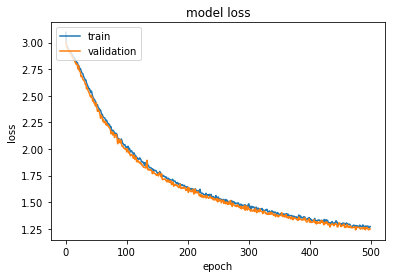

In [415]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()